In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:

firefox_edges = 0

ipcrafter_firefox_coverage = None
ipcrafter_firefox_exec_time = 7.15

seconds_per_hour = 3600

with open('ipcrafter_firefox_browser_coverage.csv', 'r') as f:
    ipcrafter_firefox_coverage = pd.read_csv(f, header=None)
    firefox_edges = ipcrafter_firefox_coverage.iloc[0,1]

    ipcrafter_firefox_coverage.columns = ['input', 'browser_coverage']
    ipcrafter_firefox_coverage.drop(ipcrafter_firefox_coverage.index[0], inplace=True)

with open('ipcrafter_firefox_all_coverage.csv', 'r') as f:
    ipcrafter_firefox_all_coverage = pd.read_csv(f, header=None)
    ipcrafter_firefox_all_coverage.columns = ['input', 'all_coverage']
    ipcrafter_firefox_all_coverage.drop(ipcrafter_firefox_all_coverage.index[0], inplace=True)
    ipcrafter_firefox_coverage = pd.concat([ipcrafter_firefox_coverage, ipcrafter_firefox_all_coverage['all_coverage']], axis=1)

ipcrafter_firefox_coverage['input'] = ipcrafter_firefox_coverage['input'].astype(float).apply(lambda x: x*ipcrafter_firefox_exec_time / seconds_per_hour)
ipcrafter_firefox_coverage.rename(columns={'input': 'time'}, inplace=True)

ipcrafter_firefox_coverage = ipcrafter_firefox_coverage[ipcrafter_firefox_coverage['time'] <= 24]

ipcrafter_firefox_coverage['browser_coverage'] = ipcrafter_firefox_coverage['browser_coverage'].astype(float).apply(lambda x: x/firefox_edges)
ipcrafter_firefox_coverage['all_coverage'] = ipcrafter_firefox_coverage['all_coverage'].astype(float).apply(lambda x: x/firefox_edges)
print(ipcrafter_firefox_coverage)




            time  browser_coverage  all_coverage
1       0.000000          0.000000      0.000000
2       0.001986          0.063890      0.074834
3       0.003972          0.066428      0.078962
4       0.005958          0.069388      0.082609
5       0.007944          0.069388      0.082617
...          ...               ...           ...
12080  23.990236          0.087371      0.120476
12081  23.992222          0.087371      0.120476
12082  23.994208          0.087371      0.120476
12083  23.996194          0.087371      0.120476
12084  23.998181          0.087371      0.120476

[12084 rows x 3 columns]


In [7]:
fuzzorigin_firefox_coverage = None
fuzzorigin_firefox_exec_time = 6.79


with open('fuzzorigin_firefox_browser_coverage.csv', 'r') as f:
    fuzzorigin_firefox_coverage = pd.read_csv(f, header=None)

    fuzzorigin_firefox_coverage.columns = ['input', 'browser_coverage']
    fuzzorigin_firefox_coverage.drop(fuzzorigin_firefox_coverage.index[0], inplace=True)

with open('fuzzorigin_firefox_all_coverage.csv', 'r') as f:
    df = pd.read_csv(f, header=None)
    df.columns = ['input', 'all_coverage']
    df.drop(df.index[0], inplace=True)
    fuzzorigin_firefox_coverage = pd.concat([fuzzorigin_firefox_coverage, df['all_coverage']], axis=1)

fuzzorigin_firefox_coverage['input'] = fuzzorigin_firefox_coverage['input'].astype(float).apply(lambda x: x*fuzzorigin_firefox_exec_time / seconds_per_hour)
fuzzorigin_firefox_coverage.rename(columns={'input': 'time'}, inplace=True)

fuzzorigin_firefox_coverage = fuzzorigin_firefox_coverage[fuzzorigin_firefox_coverage['time'] <= 24]

fuzzorigin_firefox_coverage['browser_coverage'] = fuzzorigin_firefox_coverage['browser_coverage'].astype(float).apply(lambda x: x/firefox_edges)
fuzzorigin_firefox_coverage['all_coverage'] = fuzzorigin_firefox_coverage['all_coverage'].astype(float).apply(lambda x: x/firefox_edges)
print(fuzzorigin_firefox_coverage)

            time  browser_coverage  all_coverage
1       0.000000          0.000000      0.000000
2       0.001886          0.062758      0.073206
3       0.003772          0.063588      0.076345
4       0.005658          0.066687      0.082043
5       0.007544          0.067486      0.086443
...          ...               ...           ...
12721  23.991333          0.086726      0.122328
12722  23.993219          0.086726      0.122328
12723  23.995106          0.086726      0.122329
12724  23.996992          0.086726      0.122329
12725  23.998878          0.086726      0.122329

[12725 rows x 3 columns]


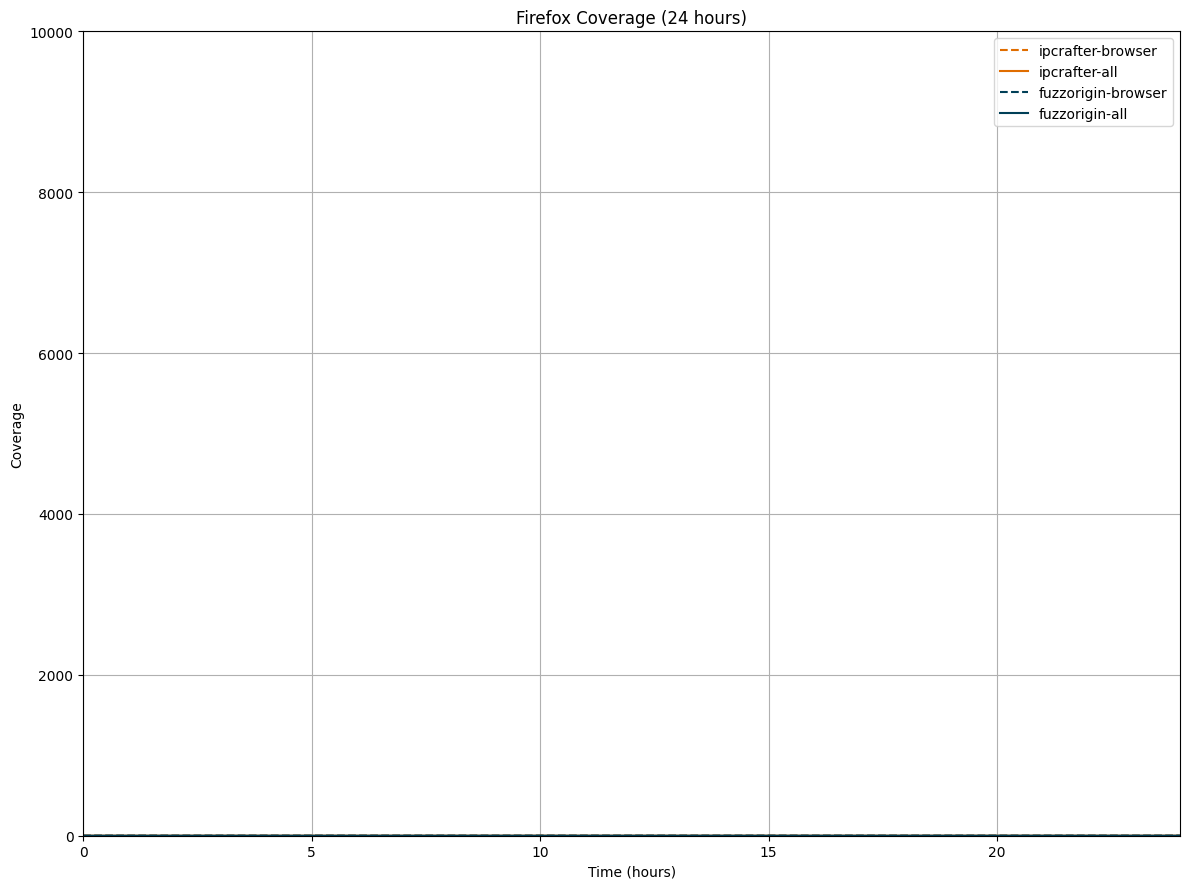

In [ ]:
# Create a plot
plt.figure(figsize=(12, 9))

orange = (225/256, 109/256, 0)
blue = (0, 63/256, 87/256)

# Plotting the two coverage metrics
plt.plot(ipcrafter_firefox_coverage['time'], ipcrafter_firefox_coverage['browser_coverage'], label='ipcrafter-browser', color=orange, linestyle='--')
plt.plot(ipcrafter_firefox_coverage['time'], ipcrafter_firefox_coverage['all_coverage'], label='ipcrafter-all', color=orange)

plt.plot(fuzzorigin_firefox_coverage['time'], fuzzorigin_firefox_coverage['browser_coverage'], label='fuzzorigin-browser', color=blue, linestyle='--')
plt.plot(fuzzorigin_firefox_coverage['time'], fuzzorigin_firefox_coverage['all_coverage'], label='fuzzorigin-all', color=blue)

# Adding titles and labels
plt.title('Firefox Coverage (24 hours)')
plt.xlabel('Time (hours)')
plt.ylabel('Coverage')
# plt.axvline(x=24, color='red', linestyle='--', label='24 seconds Mark')  # Optional line for 24 seconds
plt.legend()
plt.grid()
plt.xlim(0, 24)  # Limit x-axis to 24 seconds
plt.ylim(0, ipcrafter_firefox_coverage[['browser_coverage', 'all_coverage']].max().max() + 0.01)  # Adjust y-axis for visibility
plt.tight_layout()  # Adjust layout to prevent clipping of titles/labels
plt.show()